In [135]:
import pandas as pd
import numpy as np

import seaborn as sns 
from matplotlib import pyplot as plt
 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

In [71]:
x_data_generated, y_data_generated = make_classification(scale=1)

In [72]:
cross_val_score(LogisticRegression(), x_data_generated, y_data_generated, scoring='accuracy').mean()

0.8299999999999998

In [73]:
df = pd.DataFrame(x_data_generated, columns=range(20))

<AxesSubplot:>

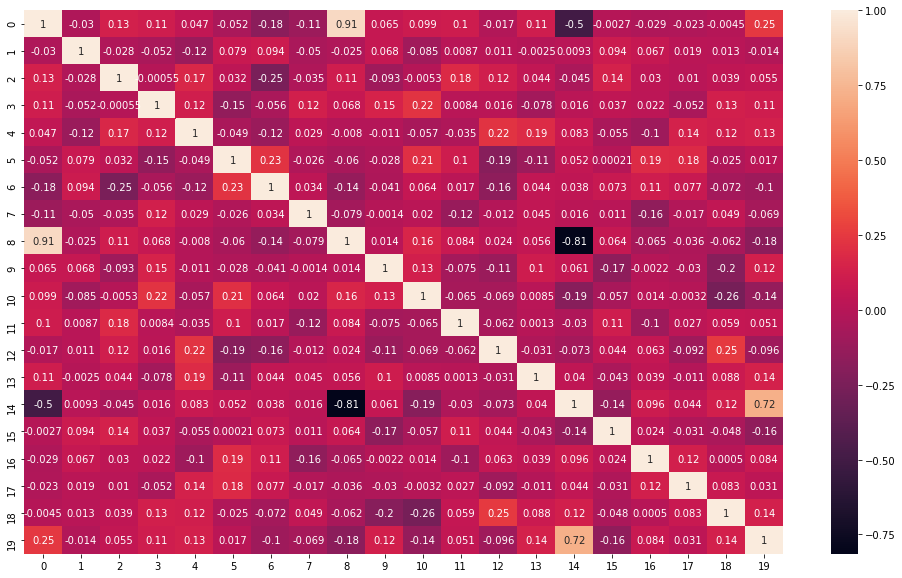

In [74]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(17)

sns.heatmap(df.corr(), annot=True)

достаточно сильно между собой коррелируют 0 и 8 признаки, 8 и 14 признаки, 14 и 19 признаки, удаляем 8 и 14.

In [80]:
x_del_1 = np.delete(x_data_generated,[14],1)
x_del_1 = np.delete(x_del_1,[8],1)

In [81]:
x_del_1.shape

(100, 18)

In [87]:
VarianceThreshold(.10).fit_transform(x_del_1).shape

(100, 18)

низковариативные признаки, очевидно, не найдены VarianceThreshold

In [88]:
cross_val_score(LogisticRegression(), x_del_1, y_data_generated, scoring='accuracy').mean()

0.8299999999999998

точность не поменялась

In [124]:
result_table = pd.DataFrame({'способ выбора признаков': ['', '', '', '', ''], 
                   'количество признаков': ['', '', '', '', ''],
                   'средняя точность модели': ['', '', '', '', '']})

In [127]:
result_table['способ выбора признаков'][0] = 'матрица корреляции + VarianceThreshold'
result_table['количество признаков'][0] = 18
result_table['средняя точность модели'][0] = 0.83

In [157]:
x_del_2 = SelectKBest(k=5).fit_transform(x_data_generated, y_data_generated)
x_del_2.shape

(100, 5)

Скоринговой функцией для классификации f_classif оставили 5 признаков

In [158]:
cross_val_score(LogisticRegression(), x_del_2, y_data_generated, scoring='accuracy').mean()

0.86

In [126]:
result_table['способ выбора признаков'][1] = 'Скоринговая функция f_classif'
result_table['количество признаков'][1] = 5
result_table['средняя точность модели'][1] = 0.86

In [104]:
model =  LogisticRegression()
model.fit(x_data_generated, y_data_generated)
model.intercept_, model.coef_

(array([-0.16362422]),
 array([[ 1.97472141,  0.14256778,  0.1598477 ,  0.17947003,  0.17007491,
         -0.77616206,  0.35842409,  0.25538348,  0.7668107 , -0.32740927,
          0.79459998,  0.37627677, -0.36726902, -0.13826509, -0.95959754,
         -0.68584461,  0.1605315 ,  0.16608072,  0.1807853 ,  0.27696617]]))

убираем признаки: 1, 2, 3, 4, 13, 16, 17, 18

In [106]:
x_del_3 = np.delete(x_data_generated, [1, 2, 3, 4, 13, 16, 17, 18], 1)
x_del_3.shape

(100, 12)

In [117]:
selector = SelectFromModel(estimator=LogisticRegression(C=8.0)).fit(x_del_3, y_data_generated)
x_sel = selector.transform(x_del_3)
x_sel.shape

(100, 5)

In [118]:
cross_val_score(LogisticRegression(), x_sel, y_data_generated, scoring='accuracy').mean()

0.8799999999999999

In [128]:
result_table['способ выбора признаков'][2] = 'LogisticRegression + selector(LogisticRegression(C=8.0))'
result_table['количество признаков'][2] = 5
result_table['средняя точность модели'][2] = 0.88

In [123]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_data_generated, y_data_generated)

clf.feature_importances_

array([0.31004437, 0.01298456, 0.01044372, 0.02058755, 0.00791015,
       0.02481187, 0.01525089, 0.00474952, 0.25985483, 0.00234283,
       0.03887262, 0.0180098 , 0.0342641 , 0.01824528, 0.11620996,
       0.01516472, 0.01265585, 0.0178299 , 0.01148594, 0.04828155])

In [129]:
x_del_4 = np.delete(x_data_generated, [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19], 1)
x_del_4.shape

(100, 3)

In [130]:
cross_val_score(LogisticRegression(), x_del_4, y_data_generated, scoring='accuracy').mean()

0.8400000000000001

In [131]:
result_table['способ выбора признаков'][3] = 'RandomForestClassifier'
result_table['количество признаков'][3] = 3
result_table['средняя точность модели'][3] = 0.84

In [143]:
knn = KNeighborsClassifier(n_neighbors=10)
sfs = SequentialFeatureSelector(knn, n_features_to_select=7)
sfs.fit(x_data_generated, y_data_generated)
x_del_5 = sfs.transform(x_data_generated)
x_del_5.shape

(100, 7)

In [144]:
cross_val_score(LogisticRegression(), x_del_5, y_data_generated, scoring='accuracy').mean()

0.86

In [145]:
result_table['способ выбора признаков'][4] = 'SequentialFeatureSelector(KNeighborsClassifier)'
result_table['количество признаков'][4] = 7
result_table['средняя точность модели'][4] = 0.86

In [146]:
result_table

,способ выбора признаков,количество признаков,средняя точность модели
0,матрица корреляции + VarianceThreshold,18,0.83
1,Скоринговая функция f_classif,5,0.86
2,LogisticRegression + selector(LogisticRegressi...,5,0.88
3,RandomForestClassifier,3,0.84
4,SequentialFeatureSelector(KNeighborsClassifier),7,0.86
